# Lecture 1 – Introduction to Unsupervised Learning and Distance Metrics
---


## Why Unsupervised Learning?

In many real-world situations, we have data but **no labels**. 

Think about:

- **Sensor data**: continuous streams from industrial machines, without predefined categories
- **Economic data**: firm characteristics, consumer transactions, market indicators — rich datasets where the "groups" are not known in advance
- **Genomics**: gene expression profiles across patients, without disease labels
- **Log files**: user behavior patterns on websites or applications

In all these cases, we cannot apply supervised learning because there is no target variable $y$ to predict. Yet, we still want to extract meaningful information from the data.

### What can unsupervised learning do?

Unsupervised learning serves several purposes:

| Purpose | Description | Example |
|---------|-------------|--------|
| **Exploration** | Understand the structure of your data | Discovering customer segments |
| **Structure discovery** | Find natural groupings or patterns | Identifying market regimes |
| **Compression** | Reduce dimensionality while preserving information | Summarizing economic indicators |
| **Feature learning** | Create new representations for downstream tasks | Building embeddings for text |

### The epistemological difference

There is a fundamental difference in what we are trying to achieve:

**Supervised learning** → **Prediction**  
We have a target, and we optimize to minimize prediction error.

**Unsupervised learning** → **Modeling structure**  
We have no target. We seek to discover and represent the underlying organization of the data.

This difference has profound implications. In supervised learning, we can measure success objectively (did we predict correctly?). In unsupervised learning, evaluation is harder — we need to judge whether the discovered structure is *useful* and *meaningful*.

<div style="background-color: #667eea; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%) !important; color: white !important; padding: 20px; border-radius: 10px; margin: 20px 0;">
    <h3 style="margin-top: 0; color: white !important;">💡 Key Message</h3>
    <p style="font-size: 1.1em; margin-bottom: 0; color: white !important;">
        <strong>"Here we are not looking for the right answer, but for a useful representation."</strong>
    </p>
</div>

In [1]:
from IPython.display import HTML, display
from IPython.core.display import Javascript

# Questo script nasconde SOLO l'input della cella in cui viene eseguito
hide_input_script = """
<script>
    (function() {
        // 1. Trova lo script che sta venendo eseguito in questo momento
        var myScript = document.currentScript;
        
        // 2. Risale fino a trovare il contenitore della cella corrente (compatibile con Notebook 7+)
        var myCell = myScript.closest('.jp-Cell') || myScript.closest('.cell');
        
        if (myCell) {
            // 3. Cerca l'area di input SOLO dentro questa specifica cella
            var myInput = myCell.querySelector('.jp-Cell-inputWrapper') || myCell.querySelector('.jp-InputArea') || myCell.querySelector('.input');
            
            if (myInput) {
                myInput.style.display = 'none';
            }
        }
    })();
</script>
"""

display(HTML(hide_input_script))

animation_html = """
<div id="ml-paradigms-app" style="font-family: system-ui, -apple-system, sans-serif;"></div>

<style>
    #ml-paradigms-app { background: #f8fafc; padding: 20px; border-radius: 12px; }
    #ml-paradigms-app .fade-in { animation: fadeIn 0.5s ease-in; }
    @keyframes mlPulse { 0%, 100% { transform: scale(1); } 50% { transform: scale(1.15); } }
    #ml-paradigms-app .pulse { animation: mlPulse 1.5s infinite; }
    #ml-paradigms-app button { cursor: pointer; border: none; }
    #ml-paradigms-app button:hover { opacity: 0.9; }
    #ml-paradigms-app table { border-collapse: collapse; }
    #ml-paradigms-app th, #ml-paradigms-app td { padding: 8px 12px; }
</style>

<script>
(function() {
    const paradigms = [
        {
            name: 'Supervised Learning',
            icon: '🎯',
            color: 'blue',
            colorHex: '#3b82f6',
            bgHex: '#dbeafe',
            description: 'Learn from labeled examples to predict outcomes',
            data: 'Labeled data (X, y)',
            goal: 'Minimize prediction error',
            evaluation: 'Accuracy, MSE, F1',
            example: 'Spam detection, price prediction',
            keyInsight: 'We have the "answers" and learn to predict them'
        },
        {
            name: 'Unsupervised Learning',
            icon: '🔍',
            color: 'purple',
            colorHex: '#8b5cf6',
            bgHex: '#ede9fe',
            description: 'Discover hidden patterns without labels',
            data: 'Unlabeled data (X only)',
            goal: 'Find structure / representation',
            evaluation: 'Subjective / domain-specific',
            example: 'Customer segmentation, topic discovery',
            keyInsight: 'No "right answer" — we seek useful representations'
        },
        {
            name: 'Reinforcement Learning',
            icon: '🎮',
            color: 'amber',
            colorHex: '#f59e0b',
            bgHex: '#fef3c7',
            description: 'Learn through interaction and rewards',
            data: 'Environment + rewards',
            goal: 'Maximize cumulative reward',
            evaluation: 'Total reward achieved',
            example: 'Game playing, robotics, trading',
            keyInsight: 'Learn from trial and error, not from examples'
        }
    ];

    let currentPhase = 0;
    let animationStep = 0;
    let autoPlay = true;
    let intervalId = null;

    function renderSVG() {
        const phase = currentPhase;
        const step = animationStep;
        
        if (phase === 0) {
            // Supervised Learning
            const points = [
                { x: 70, y: 60, label: 'A' }, { x: 90, y: 80, label: 'A' }, { x: 80, y: 95, label: 'A' },
                { x: 60, y: 85, label: 'A' }, { x: 100, y: 70, label: 'A' },
                { x: 190, y: 130, label: 'B' }, { x: 210, y: 150, label: 'B' }, { x: 180, y: 160, label: 'B' },
                { x: 200, y: 125, label: 'B' }, { x: 220, y: 145, label: 'B' },
            ];
            
            let svg = `
                <defs>
                    <pattern id="grid-sup" width="20" height="20" patternUnits="userSpaceOnUse">
                        <path d="M 20 0 L 0 0 0 20" fill="none" stroke="#e5e7eb" stroke-width="0.5"/>
                    </pattern>
                </defs>
                <rect width="300" height="200" fill="url(#grid-sup)"/>
            `;
            
            // Draw points
            points.forEach((p, i) => {
                const color = step >= 1 ? (p.label === 'A' ? '#3b82f6' : '#ef4444') : '#94a3b8';
                const r = step >= 1 ? 10 : 7;
                svg += '<circle cx="' + p.x + '" cy="' + p.y + '" r="' + r + '" fill="' + color + '"/>';
                if (step >= 1) {
                    svg += '<text x="' + p.x + '" y="' + (p.y + 4) + '" text-anchor="middle" fill="white" font-size="11" font-weight="bold">' + p.label + '</text>';
                }
            });
            
            // Decision boundary
            if (step >= 2) {
                const dasharray = step >= 3 ? '0' : '8,4';
                svg += '<line x1="30" y1="190" x2="270" y2="30" stroke="#8b5cf6" stroke-width="3" stroke-dasharray="' + dasharray + '"/>';
            }
            
            // New point
            if (step >= 3) {
                svg += '<circle cx="140" cy="100" r="12" fill="#fbbf24" stroke="#f59e0b" stroke-width="2" class="pulse"/>';
                svg += '<text x="158" y="98" fill="#92400e" font-size="12" font-weight="bold">? → A</text>';
            }
            
            // Labels
            svg += '<text x="75" y="25" fill="#3b82f6" font-size="13" font-weight="bold">Class A</text>';
            svg += '<text x="190" y="190" fill="#ef4444" font-size="13" font-weight="bold">Class B</text>';
            
            return svg;
        } 
        else if (phase === 1) {
            // Unsupervised Learning
            const points = [
                { x: 60, y: 55 }, { x: 80, y: 70 }, { x: 70, y: 85 }, { x: 50, y: 65 }, { x: 90, y: 60 },
                { x: 200, y: 120 }, { x: 215, y: 135 }, { x: 195, y: 145 }, { x: 220, y: 115 }, { x: 205, y: 155 },
                { x: 130, y: 160 }, { x: 145, y: 175 }, { x: 120, y: 170 }, { x: 150, y: 155 }, { x: 135, y: 180 },
            ];
            
            let svg = `
                <defs>
                    <pattern id="grid-unsup" width="20" height="20" patternUnits="userSpaceOnUse">
                        <path d="M 20 0 L 0 0 0 20" fill="none" stroke="#e5e7eb" stroke-width="0.5"/>
                    </pattern>
                </defs>
                <rect width="300" height="200" fill="url(#grid-unsup)"/>
            `;
            
            // Question mark for initial state
            if (step < 2) {
                svg += '<text x="150" y="25" fill="#64748b" font-size="13" text-anchor="middle" font-weight="bold">No labels — what structure exists?</text>';
            }
            
            // Draw points
            points.forEach((p, i) => {
                let color = '#94a3b8';
                if (step >= 2) {
                    if (i < 5) color = '#3b82f6';
                    else if (i < 10) color = '#ef4444';
                    else color = '#22c55e';
                }
                const r = step >= 2 ? 9 : 6;
                svg += '<circle cx="' + p.x + '" cy="' + p.y + '" r="' + r + '" fill="' + color + '"/>';
            });
            
            // Cluster boundaries
            if (step >= 3) {
                svg += '<ellipse cx="70" cy="67" rx="45" ry="35" fill="none" stroke="#3b82f6" stroke-width="2" stroke-dasharray="6,3" opacity="0.7"/>';
                svg += '<ellipse cx="207" cy="135" rx="40" ry="40" fill="none" stroke="#ef4444" stroke-width="2" stroke-dasharray="6,3" opacity="0.7"/>';
                svg += '<ellipse cx="137" cy="168" rx="35" ry="28" fill="none" stroke="#22c55e" stroke-width="2" stroke-dasharray="6,3" opacity="0.7"/>';
                svg += '<text x="70" y="25" fill="#3b82f6" font-size="11" font-weight="bold" text-anchor="middle">Cluster 1</text>';
                svg += '<text x="207" y="190" fill="#ef4444" font-size="11" font-weight="bold" text-anchor="middle">Cluster 2</text>';
                svg += '<text x="137" y="198" fill="#22c55e" font-size="11" font-weight="bold" text-anchor="middle">Cluster 3</text>';
            }
            
            return svg;
        }
        else {
            // Reinforcement Learning
            const agentPositions = [
                { x: 35, y: 165 }, { x: 65, y: 145 }, { x: 100, y: 155 }, { x: 130, y: 120 },
                { x: 155, y: 90 }, { x: 185, y: 75 }, { x: 215, y: 55 }, { x: 245, y: 45 }
            ];
            const agentPos = agentPositions[Math.min(step * 2, agentPositions.length - 1)];
            
            let svg = `
                <defs>
                    <pattern id="grid-rl" width="20" height="20" patternUnits="userSpaceOnUse">
                        <path d="M 20 0 L 0 0 0 20" fill="none" stroke="#e5e7eb" stroke-width="0.5"/>
                    </pattern>
                </defs>
                <rect width="300" height="200" fill="url(#grid-rl)"/>
                <rect x="15" y="15" width="270" height="170" fill="none" stroke="#cbd5e1" stroke-width="2" rx="5"/>
            `;
            
            // Obstacles
            svg += '<rect x="90" y="50" width="50" height="18" fill="#64748b" rx="3"/>';
            svg += '<rect x="55" y="100" width="18" height="55" fill="#64748b" rx="3"/>';
            svg += '<rect x="170" y="85" width="18" height="60" fill="#64748b" rx="3"/>';
            
            // Goal
            svg += '<circle cx="255" cy="40" r="18" fill="#fbbf24" stroke="#f59e0b" stroke-width="2" class="pulse"/>';
            svg += '<text x="255" y="46" text-anchor="middle" fill="#92400e" font-size="16" font-weight="bold">★</text>';
            
            // Agent path
            if (step >= 1) {
                const pathPoints = agentPositions.slice(0, Math.min(step * 2 + 1, agentPositions.length));
                const pathStr = pathPoints.map(function(p) { return p.x + ',' + p.y; }).join(' ');
                svg += '<polyline points="' + pathStr + '" fill="none" stroke="#8b5cf6" stroke-width="2" stroke-dasharray="5,3" opacity="0.6"/>';
            }
            
            // Rewards
            if (step >= 2) {
                svg += '<text x="110" y="95" fill="#22c55e" font-size="11" font-weight="bold">+1</text>';
                svg += '<text x="80" y="130" fill="#ef4444" font-size="11" font-weight="bold">-1</text>';
            }
            if (step >= 3) {
                svg += '<text x="230" y="70" fill="#22c55e" font-size="13" font-weight="bold">+100!</text>';
            }
            
            // Agent
            svg += '<circle cx="' + agentPos.x + '" cy="' + agentPos.y + '" r="14" fill="#8b5cf6" stroke="#6d28d9" stroke-width="2" class="pulse"/>';
            svg += '<text x="' + agentPos.x + '" y="' + (agentPos.y + 5) + '" text-anchor="middle" fill="white" font-size="12">🤖</text>';
            
            // Labels
            svg += '<text x="35" y="185" fill="#64748b" font-size="10">Start</text>';
            
            return svg;
        }
    }

    function render() {
        const p = paradigms[currentPhase];
        
        let buttonsHtml = '';
        paradigms.forEach(function(par, i) {
            const isActive = currentPhase === i;
            const btnStyle = isActive 
                ? 'background: #7c3aed; color: white; box-shadow: 0 4px 6px rgba(0,0,0,0.1);' 
                : 'background: white; color: #4b5563; border: 1px solid #e5e7eb;';
            buttonsHtml += '<button onclick="window.mlSetPhase(' + i + ')" style="padding: 8px 16px; border-radius: 8px; font-weight: 500; margin-right: 8px; ' + btnStyle + '">' + par.icon + ' ' + par.name.split(' ')[0] + '</button>';
        });
        
        const playBtnStyle = autoPlay 
            ? 'background: #22c55e; color: white;' 
            : 'background: #e5e7eb; color: #374151;';
        buttonsHtml += '<button onclick="window.mlToggleAutoPlay()" style="padding: 8px 16px; border-radius: 8px; font-weight: 500; margin-left: 16px; ' + playBtnStyle + '">' + (autoPlay ? '⏸ Pause' : '▶ Play') + '</button>';
        
        // Step indicators
        let stepsHtml = '';
        for (let i = 0; i < 12; i++) {
            const globalStep = currentPhase * 4 + animationStep;
            let dotStyle = 'width: 12px; height: 12px; border-radius: 50%; display: inline-block; margin: 0 3px; cursor: pointer; ';
            if (i === globalStep) {
                dotStyle += 'background: #7c3aed; transform: scale(1.3);';
            } else if (Math.floor(i / 4) === currentPhase) {
                dotStyle += 'background: #c4b5fd;';
            } else {
                dotStyle += 'background: #d1d5db;';
            }
            stepsHtml += '<span onclick="window.mlSetStep(' + i + ')" style="' + dotStyle + '"></span>';
        }
        
        // Description items with fade effect
        const descItems = [
            { label: 'Data', value: p.data },
            { label: 'Goal', value: p.goal },
            { label: 'Evaluation', value: p.evaluation },
            { label: 'Example', value: p.example }
        ];
        let descHtml = '';
        descItems.forEach(function(item, i) {
            const opacity = animationStep >= i ? '1' : '0.3';
            descHtml += '<p style="margin: 8px 0; opacity: ' + opacity + '; transition: opacity 0.3s;"><strong>' + item.label + ':</strong> ' + item.value + '</p>';
        });
        
        // Table rows highlighting
        const tableHighlight = ['', '', ''];
        tableHighlight[currentPhase] = 'background: ' + p.bgHex + ';';
        
        document.getElementById('ml-paradigms-app').innerHTML = `
            <div style="display: flex; flex-direction: column; align-items: center;">
                <h2 style="font-size: 1.5rem; font-weight: bold; color: #1f2937; margin-bottom: 16px;">The Three Paradigms of Machine Learning</h2>
                
                <div style="margin-bottom: 16px;">
                    ${buttonsHtml}
                </div>
                
                <div style="display: flex; gap: 24px; width: 100%;">
                    <!-- SVG Visualization -->
                    <div style="flex: 1;">
                        <svg viewBox="0 0 300 200" style="width: 100%; background: white; border-radius: 12px; box-shadow: 0 1px 3px rgba(0,0,0,0.1); border: 2px solid #e5e7eb;">
                            ${renderSVG()}
                        </svg>
                    </div>
                    
                    <!-- Description Panel -->
                    <div style="width: 280px; background: white; border-radius: 12px; box-shadow: 0 1px 3px rgba(0,0,0,0.1); padding: 20px; border: 2px solid #e5e7eb;">
                        <h3 style="font-size: 1.1rem; font-weight: bold; color: ${p.colorHex}; margin: 0 0 12px 0;">
                            <span style="font-size: 1.5rem; margin-right: 8px;">${p.icon}</span>${p.name}
                        </h3>
                        <p style="font-size: 0.9rem; color: #6b7280; margin-bottom: 16px;">${p.description}</p>
                        
                        <div style="font-size: 0.85rem; color: #4b5563;">
                            ${descHtml}
                        </div>
                        
                        <div style="margin-top: 16px; padding: 12px; background: ${p.bgHex}; border-radius: 8px; font-size: 0.8rem; color: ${p.colorHex};">
                            <strong>Key:</strong> ${p.keyInsight}
                        </div>
                    </div>
                </div>
                
                <!-- Comparison Table -->
                <div style="margin-top: 24px; width: 100%; background: white; border-radius: 12px; box-shadow: 0 1px 3px rgba(0,0,0,0.1); padding: 16px; border: 2px solid #e5e7eb; overflow-x: auto;">
                    <table style="width: 100%; font-size: 0.85rem;">
                        <thead>
                            <tr style="border-bottom: 2px solid #e5e7eb;">
                                <th style="text-align: left; font-weight: bold;">Aspect</th>
                                <th style="text-align: center; ${tableHighlight[0]}">🎯 Supervised</th>
                                <th style="text-align: center; ${tableHighlight[1]}">🔍 Unsupervised</th>
                                <th style="text-align: center; ${tableHighlight[2]}">🎮 Reinforcement</th>
                            </tr>
                        </thead>
                        <tbody style="color: #4b5563;">
                            <tr style="border-bottom: 1px solid #f3f4f6;">
                                <td style="font-weight: 500;">Labels?</td>
                                <td style="text-align: center;">✅ Yes (y)</td>
                                <td style="text-align: center;">❌ No</td>
                                <td style="text-align: center;">⚡ Rewards</td>
                            </tr>
                            <tr style="border-bottom: 1px solid #f3f4f6;">
                                <td style="font-weight: 500;">Objective</td>
                                <td style="text-align: center;">Predict y from X</td>
                                <td style="text-align: center;">Find structure in X</td>
                                <td style="text-align: center;">Max. reward</td>
                            </tr>
                            <tr style="border-bottom: 1px solid #f3f4f6;">
                                <td style="font-weight: 500;">Evaluation</td>
                                <td style="text-align: center;">Accuracy, MSE</td>
                                <td style="text-align: center;">Domain-specific</td>
                                <td style="text-align: center;">Total reward</td>
                            </tr>
                            <tr>
                                <td style="font-weight: 500;">Example</td>
                                <td style="text-align: center;">Spam filter</td>
                                <td style="text-align: center;">Customer segments</td>
                                <td style="text-align: center;">Game AI</td>
                            </tr>
                        </tbody>
                    </table>
                </div>
                
                <!-- Step indicator -->
                <div style="margin-top: 16px;">
                    ${stepsHtml}
                </div>
            </div>
        `;
    }

    window.mlSetPhase = function(phase) {
        currentPhase = phase;
        animationStep = 0;
        autoPlay = false;
        stopAutoPlay();
        render();
    };

    window.mlSetStep = function(globalStep) {
        currentPhase = Math.floor(globalStep / 4);
        animationStep = globalStep % 4;
        autoPlay = false;
        stopAutoPlay();
        render();
    };

    window.mlToggleAutoPlay = function() {
        autoPlay = !autoPlay;
        if (autoPlay) {
            startAutoPlay();
        } else {
            stopAutoPlay();
        }
        render();
    };

    function startAutoPlay() {
        if (intervalId) return;
        intervalId = setInterval(function() {
            animationStep++;
            if (animationStep > 3) {
                animationStep = 0;
                currentPhase = (currentPhase + 1) % 3;
            }
            render();
        }, 1800);
    }

    function stopAutoPlay() {
        if (intervalId) {
            clearInterval(intervalId);
            intervalId = null;
        }
    }

    // Initial render
    render();
    startAutoPlay();
})();
</script>
"""

display(HTML(animation_html))

---

#  Mathematical Formalization

---

##  The General Mathematical Setting

Let us formalize what we are working with.

### The dataset

We observe a collection of $n$ data points, each described by $d$ features:

$$\mathcal{D} = \{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n\}, \quad \mathbf{x}_i \in \mathbb{R}^d$$

Each observation $\mathbf{x}_i$ is a vector:

$$\mathbf{x}_i = \begin{pmatrix} x_{i1} \\ x_{i2} \\ \vdots \\ x_{id} \end{pmatrix}$$

For example, if we study firms, each $\mathbf{x}_i$ might contain: revenue, number of employees, R&D expenditure, age, and so on.

### What is missing?

There is **no target variable** $y$. We only have the features $\mathbf{X}$, not the labels.

### The implicit hypothesis

Unsupervised learning rests on a crucial assumption:

> **There exists a latent structure in the data, and this structure is reflected by similarity between observations.**

In other words, we believe that:
1. The data is not just random noise
2. Similar observations (in some meaningful sense) share common underlying characteristics
3. By measuring similarity, we can uncover this hidden structure

This brings us to the central question: **how do we measure similarity?**

##  Similarity and Distance

To compare observations, we need a way to quantify how "close" or "similar" they are. This is typically done through a **distance function**.

### Definition

A distance function is a mapping:

$$d: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}_{\geq 0}$$

It takes two vectors and returns a non-negative real number representing how "far apart" they are.

### Properties of a metric

A proper distance function (called a **metric**) must satisfy four properties:

| Property | Mathematical formulation | Intuition |
|----------|-------------------------|----------|
| **Non-negativity** | $d(\mathbf{x}, \mathbf{y}) \geq 0$ | Distances cannot be negative |
| **Identity** | $d(\mathbf{x}, \mathbf{y}) = 0 \Leftrightarrow \mathbf{x} = \mathbf{y}$ | Zero distance means identical points |
| **Symmetry** | $d(\mathbf{x}, \mathbf{y}) = d(\mathbf{y}, \mathbf{x})$ | Distance from A to B equals B to A |
| **Triangle inequality** | $d(\mathbf{x}, \mathbf{z}) \leq d(\mathbf{x}, \mathbf{y}) + d(\mathbf{y}, \mathbf{z})$ | Direct path is never longer than detour |

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #ffc107; margin: 20px 0;">
<strong>⚠️ Important Note</strong><br>
Not all algorithms require a true metric. Some work with similarity measures that violate one or more properties. However, many fundamental algorithms (like K-Means) rely heavily on metric properties, especially the triangle inequality for efficient computation.
</div>

---

# Main Distance Metrics

---

## Euclidean Distance

The most intuitive and widely used distance is the **Euclidean distance**, which corresponds to the "straight line" between two points.

### Formula

$$d_{\text{Euclidean}}(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{j=1}^{d} (x_j - y_j)^2}$$

This is simply the extension of the Pythagorean theorem to $d$ dimensions.

### Geometric interpretation

In 2D, this is exactly what you would measure with a ruler on a map. In higher dimensions, the same principle applies — we compute the length of the straight line connecting two points.

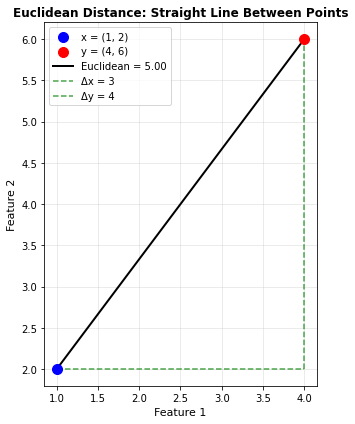

Euclidean distance = √[(4-1)² + (6-2)²] = √[9 + 16] = √25 = 5.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings 
filterwarnings("ignore")

# Two points in 2D
x = np.array([1, 2])
y = np.array([4, 6])

# Euclidean distance
euclidean_dist = np.sqrt(np.sum((x - y)**2))

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(*x, s=100, c='blue', zorder=5, label=f'x = {tuple(x)}')
ax.scatter(*y, s=100, c='red', zorder=5, label=f'y = {tuple(y)}')
ax.plot([x[0], y[0]], [x[1], y[1]], 'k-', linewidth=2, label=f'Euclidean = {euclidean_dist:.2f}')

# Show the components
ax.plot([x[0], y[0]], [x[1], x[1]], 'g--', alpha=0.7, label=f'Δx = {abs(y[0]-x[0])}')
ax.plot([y[0], y[0]], [x[1], y[1]], 'g--', alpha=0.7, label=f'Δy = {abs(y[1]-x[1])}')

ax.set_xlabel('Feature 1', fontsize=11)
ax.set_ylabel('Feature 2', fontsize=11)
ax.set_title('Euclidean Distance: Straight Line Between Points', fontsize=12, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

print(f"Euclidean distance = √[(4-1)² + (6-2)²] = √[9 + 16] = √25 = {euclidean_dist}")

### Key characteristics

**Sensitivity to scale**: Euclidean distance is heavily influenced by the scale of each feature. If one feature ranges from 0 to 1000 while another ranges from 0 to 1, the first feature will dominate the distance calculation.

**Implicit assumption**: By using Euclidean distance, we implicitly assume that all features are measured in comparable units and contribute equally to the notion of similarity.

**Mathematical connection**: Euclidean distance is the $L_2$ norm of the difference vector:

$$d_{\text{Euclidean}}(\mathbf{x}, \mathbf{y}) = \|\mathbf{x} - \mathbf{y}\|_2$$

---

## Manhattan Distance

The **Manhattan distance** (also called taxicab distance or $L_1$ distance) measures how far you would travel if you could only move along grid lines — like navigating city blocks.


$$d_{\text{Manhattan}}(\mathbf{x}, \mathbf{y}) = \sum_{j=1}^{d} |x_j - y_j|$$

Instead of squaring the differences, we simply sum their absolute values.

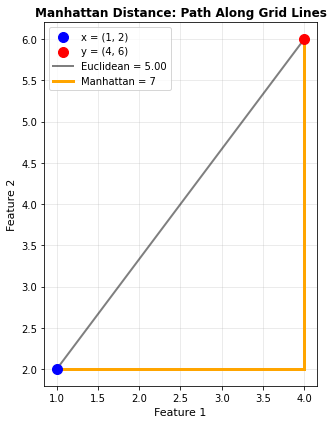

Manhattan distance = |4-1| + |6-2| = 3 + 4 = 7


In [3]:
# Same two points
x = np.array([1, 2])
y = np.array([4, 6])

# Manhattan distance
manhattan_dist = np.sum(np.abs(x - y))
euclidean_dist = np.sqrt(np.sum((x - y)**2))

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(*x, s=100, c='blue', zorder=5, label=f'x = {tuple(x)}')
ax.scatter(*y, s=100, c='red', zorder=5, label=f'y = {tuple(y)}')

# Euclidean (straight line)
ax.plot([x[0], y[0]], [x[1], y[1]], 'k-', linewidth=2, alpha=0.5, label=f'Euclidean = {euclidean_dist:.2f}')

# Manhattan (grid path)
ax.plot([x[0], y[0]], [x[1], x[1]], 'orange', linewidth=3, label=f'Manhattan = {manhattan_dist}')
ax.plot([y[0], y[0]], [x[1], y[1]], 'orange', linewidth=3)

ax.set_xlabel('Feature 1', fontsize=11)
ax.set_ylabel('Feature 2', fontsize=11)
ax.set_title('Manhattan Distance: Path Along Grid Lines', fontsize=12, fontweight='bold')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

print(f"Manhattan distance = |4-1| + |6-2| = 3 + 4 = {manhattan_dist}")

### Key characteristics

**Greater robustness to outliers**: Because we use absolute values instead of squares, extreme values have less influence. A single very large difference does not dominate as much as with Euclidean distance.

**Mathematical connection**: Manhattan distance is the $L_1$ norm:

$$d_{\text{Manhattan}}(\mathbf{x}, \mathbf{y}) = \|\mathbf{x} - \mathbf{y}\|_1$$

**When to prefer Manhattan over Euclidean?**
- When outliers are a concern
- When features represent counts or rates
- In high-dimensional spaces (it tends to behave better)

##  Minkowski Distance: The Generalized Family

The **Minkowski distance** is a generalization that unifies Euclidean and Manhattan distances into a single parametric family.

### Formula

$$d_{\text{Minkowski}}(\mathbf{x}, \mathbf{y}) = \left( \sum_{j=1}^{d} |x_j - y_j|^p \right)^{1/p}$$

where $p \geq 1$ is a parameter that controls the "shape" of the distance.

This corresponds to the $L_p$ norm of the difference vector:

$$d_p(\mathbf{x}, \mathbf{y}) = \|\mathbf{x} - \mathbf{y}\|_p$$

### Special Cases

| Parameter | Name | Formula | Geometric Interpretation |
|-----------|------|---------|--------------------------|
| $p = 1$ | Manhattan ($L_1$) | $\sum{\|x_j - y_j\|}$ | Grid-based path |
| $p = 2$ | Euclidean ($L_2$) | $\sqrt{\sum \|(x_j - y_j)^2\|}$ | Straight line |
| $p \to \infty$ | Chebyshev ($L_\infty$) | $\max_j{\|x_j - y_j\|}$ | Maximum coordinate difference |

### Key Characteristics

**Effect of $p$ on distance behavior:**

- **Lower $p$ (toward 1)**: More robust to outliers, treats all differences more equally
- **Higher $p$ (toward ∞)**: Increasingly dominated by the largest difference

**Mathematical properties:**

- For all $p \geq 1$, Minkowski distance is a proper metric (satisfies all four properties)
- As $p$ increases, the "unit ball" (set of points at distance 1 from origin) changes shape:
  - $p = 1$: Diamond (rhombus)
  - $p = 2$: Circle (sphere in higher dimensions)
  - $p \to \infty$: Square (hypercube)

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #17a2b8; margin: 20px 0;">
<strong>💡 Observation</strong><br/>
Euclidean and Manhattan distances are not competing alternatives — they are <strong>members of the same family</strong>. The Minkowski parameter <em>p</em> allows you to interpolate between them:
<ul>
<li>Need outlier robustness? → Use lower p (toward Manhattan)</li>
<li>Need geometric intuition? → Use p = 2 (Euclidean)</li>
<li>Care only about the worst-case difference? → Use high p (toward Chebyshev)</li>
</ul>
In practice, p = 1 and p = 2 cover most use cases, but knowing the general framework helps you understand <em>why</em> they behave differently.
</div>

### When to consider other values of $p$?

- **Fractional p (e.g., 1.5)**: Sometimes used in image processing and signal analysis
- **p = 3 or higher**: Rarely used in practice, but can be useful when you want to penalize large deviations more strongly than Euclidean
- **$p \to \infty$ (Chebyshev)**: Useful in game theory (chess king movement), logistics (delivery time = slowest component), and quality control (worst tolerance violation)

---

## Cosine Distance

The **cosine distance** takes a fundamentally different approach. Instead of measuring the "length" between two points, it measures the **angle** between them.

### Formula

First, we define **cosine similarity**:

$$\text{sim}_{\cos}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \cdot \|\mathbf{y}\|} = \frac{\sum_{j=1}^{d} x_j y_j}{\sqrt{\sum_{j=1}^{d} x_j^2} \cdot \sqrt{\sum_{j=1}^{d} y_j^2}}$$

The cosine similarity ranges from -1 (opposite directions) to +1 (same direction).

The **cosine distance** is then:

$$d_{\cos}(\mathbf{x}, \mathbf{y}) = 1 - \text{sim}_{\cos}(\mathbf{x}, \mathbf{y})$$

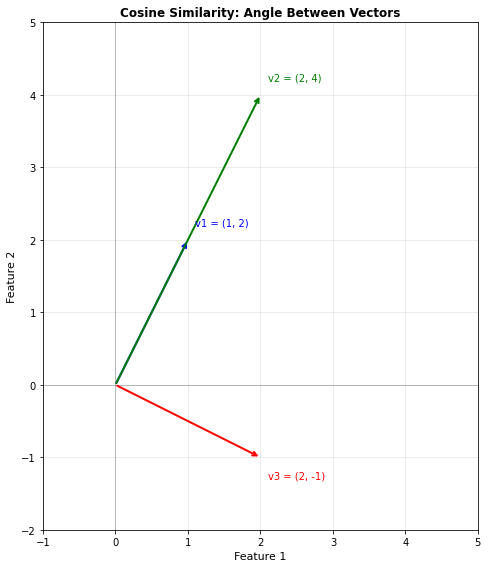

Cosine similarities:
  sim(v1, v2) = 1.0000  → Same direction (angle = 0°)
  sim(v1, v3) = 0.0000  → Different directions

Cosine distances:
  d(v1, v2) = 0.0000
  d(v1, v3) = 1.0000


In [4]:
# Demonstration of cosine similarity
# Three vectors with different magnitudes but relationships

v1 = np.array([1, 2])      # Base vector
v2 = np.array([2, 4])      # Same direction, different magnitude
v3 = np.array([2, -1])     # Different direction

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

fig, ax = plt.subplots(figsize=(8, 8))

# Plot vectors as arrows from origin
ax.annotate('', xy=v1, xytext=(0, 0), 
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax.annotate('', xy=v2, xytext=(0, 0), 
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.annotate('', xy=v3, xytext=(0, 0), 
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Labels
ax.text(v1[0]+0.1, v1[1]+0.2, f'v1 = {tuple(v1)}', fontsize=10, color='blue')
ax.text(v2[0]+0.1, v2[1]+0.2, f'v2 = {tuple(v2)}', fontsize=10, color='green')
ax.text(v3[0]+0.1, v3[1]-0.3, f'v3 = {tuple(v3)}', fontsize=10, color='red')

ax.set_xlim(-1, 5)
ax.set_ylim(-2, 5)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel('Feature 1', fontsize=11)
ax.set_ylabel('Feature 2', fontsize=11)
ax.set_title('Cosine Similarity: Angle Between Vectors', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

print("Cosine similarities:")
print(f"  sim(v1, v2) = {cosine_similarity(v1, v2):.4f}  → Same direction (angle = 0°)")
print(f"  sim(v1, v3) = {cosine_similarity(v1, v3):.4f}  → Different directions")
print(f"\nCosine distances:")
print(f"  d(v1, v2) = {1 - cosine_similarity(v1, v2):.4f}")
print(f"  d(v1, v3) = {1 - cosine_similarity(v1, v3):.4f}")

### Key characteristics

**Invariance to magnitude**: Notice that $\mathbf{v}_1 = (1, 2)$ and $\mathbf{v}_2 = (2, 4)$ have cosine similarity of 1 (distance of 0), even though their Euclidean distance is not zero. Cosine cares only about *direction*, not *length*.

**Typical use cases**:
- **Text analysis**: Documents are often represented as word frequency vectors. A longer document has larger values, but we care about the *proportion* of words, not the total count.
- **Embeddings**: Neural network embeddings (word2vec, BERT) are typically compared using cosine similarity.
- **Recommendation systems**: User preference vectors where magnitude reflects engagement intensity but direction reflects taste.

---

##  Mahalanobis Distance 

The **Mahalanobis distance** is a more sophisticated metric that accounts for the **correlation structure** of the data.

### The problem with Euclidean distance

Euclidean distance treats all dimensions independently and equally. But what if:
- Some features have much larger variance than others?
- Some features are correlated with each other?

In such cases, Euclidean distance may not capture the true "statistical distance" between points.

### Formula

$$d_M(\mathbf{x}, \mathbf{y}) = \sqrt{(\mathbf{x} - \mathbf{y})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \mathbf{y})}$$

where $\boldsymbol{\Sigma}$ is the **covariance matrix** of the data.

### Intuition

The Mahalanobis distance measures how many "standard deviations" apart two points are, while accounting for:
1. **Different variances** in each dimension
2. **Correlations** between dimensions

If $\boldsymbol{\Sigma} = \mathbf{I}$ (identity matrix), Mahalanobis reduces to Euclidean distance.

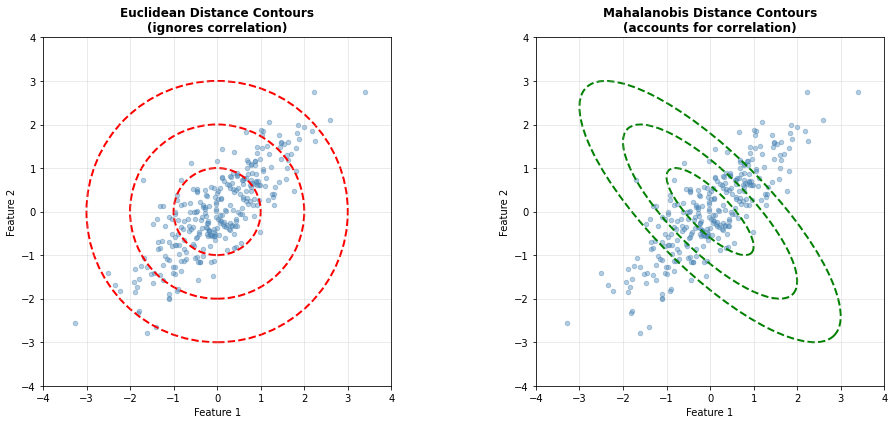

In [5]:
# Visual comparison: Euclidean vs Mahalanobis
np.random.seed(42)

# Generate correlated data
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # Strong positive correlation
data = np.random.multivariate_normal(mean, cov, 300)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Euclidean distance contours (circles)
ax = axes[0]
ax.scatter(data[:, 0], data[:, 1], alpha=0.4, s=20, c='steelblue')
for r in [1, 2, 3]:
    circle = plt.Circle((0, 0), r, fill=False, color='red', linestyle='--', linewidth=2)
    ax.add_patch(circle)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_title('Euclidean Distance Contours\n(ignores correlation)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)

# Right: Mahalanobis distance contours (ellipses aligned with data)
ax = axes[1]
ax.scatter(data[:, 0], data[:, 1], alpha=0.4, s=20, c='steelblue')

# Draw ellipses representing Mahalanobis contours
from matplotlib.patches import Ellipse
eigenvalues, eigenvectors = np.linalg.eigh(cov)
angle = np.degrees(np.arctan2(eigenvectors[1, 1], eigenvectors[0, 1]))

for n_std in [1, 2, 3]:
    width = 2 * n_std * np.sqrt(eigenvalues[0])
    height = 2 * n_std * np.sqrt(eigenvalues[1])
    ellipse = Ellipse((0, 0), width, height, angle=angle, 
                      fill=False, color='green', linestyle='--', linewidth=2)
    ax.add_patch(ellipse)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_title('Mahalanobis Distance Contours\n(accounts for correlation)', fontsize=12, fontweight='bold')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Connection to future topics

Mahalanobis distance will become crucial when we study:
- **Principal Component Analysis (PCA)**: which finds the directions of maximum variance
- **Gaussian Mixture Models (GMM)**: where each cluster has its own covariance structure

For now, the key takeaway is: **the "best" distance depends on the structure of your data**.

---

# Scaling and Normalization

---

##  Why Scaling is Crucial

Consider a simple example from economics. We want to cluster firms based on two characteristics:
- **Annual revenue**: measured in euros, ranging from €10,000 to €10,000,000
- **Number of employees**: ranging from 1 to 500

What happens when we compute Euclidean distance?

In [6]:
import numpy as np
# Two hypothetical firms
firm_A = np.array([100000, 10], dtype='float64')      # Revenue: €100k, Employees: 10
firm_B = np.array([150000, 100], dtype='float64')     # Revenue: €150k, Employees: 100

# Euclidean distance
dist = np.sqrt(np.sum((firm_A - firm_B)**2))

# Contribution of each feature
revenue_contribution = (firm_A[0] - firm_B[0])**2
employee_contribution = (firm_A[1] - firm_B[1])**2
total = revenue_contribution + employee_contribution

print("Distance calculation breakdown:")
print(f"  Revenue difference: (150000 - 100000)² = {revenue_contribution:,.0f}")
print(f"  Employee difference: (100 - 10)² = {employee_contribution:,.0f}")
print(f"  Total squared distance: {total:,.0f}")
print(f"  Euclidean distance: {dist:,.2f}")
print()
print(f"Percentage contribution:")
print(f"  Revenue: {100*revenue_contribution/total:.4f}%")
print(f"  Employees: {100*employee_contribution/total:.4f}%")

Distance calculation breakdown:
  Revenue difference: (150000 - 100000)² = 2,500,000,000
  Employee difference: (100 - 10)² = 8,100
  Total squared distance: 2,500,008,100
  Euclidean distance: 50,000.08

Percentage contribution:
  Revenue: 99.9997%
  Employees: 0.0003%


1. **The "Scale Trap"**: The algorithm treats 1 Euro of revenue exactly the same as 1 Employee. Since revenue is in the hundreds of thousands, it mathematically "drowns out" the employee count.

2. **The Consequence**: The Euclidean distance is 99.99% biased towards Revenue. If we used this to cluster companies, an automated system would see Firm A (10 employees) and Firm B (100 employees) as "far apart" solely because of money, ignoring that their operational structure is completely different.

3. **Key Takeaway**: "Raw Euclidean Distance is blind to units." Without scaling (normalization), the feature with the largest magnitude dominates the calculation, rendering smaller features irrelevant regardless of their actual information value.


Will be the same with the other distances?

## Scaling Methods

### Standardization (Z-score normalization)

The most common approach is **standardization**, which transforms each feature to have zero mean and unit variance:

$$z_j = \frac{x_j - \mu_j}{\sigma_j}$$

where:
- $\mu_j$ is the mean of feature $j$
- $\sigma_j$ is the standard deviation of feature $j$

After standardization, each feature contributes equally (in a statistical sense) to the distance.

In [7]:
# Create a small dataset of firms
np.random.seed(42)
n_firms = 100

# Revenue: log-normal distribution (€50k to €5M)
revenue = np.random.lognormal(mean=12, sigma=1, size=n_firms)
# Employees: related to revenue with noise
employees = revenue / 10000 + np.random.normal(0, 5, n_firms)
employees = np.maximum(employees, 1)  # At least 1 employee

firms = np.column_stack([revenue, employees])

# Standardize
means = firms.mean(axis=0)
stds = firms.std(axis=0)
firms_standardized = (firms - means) / stds

print("Before standardization:")
print(f"  Revenue - Mean: {means[0]:,.0f}, Std: {stds[0]:,.0f}")
print(f"  Employees - Mean: {means[1]:.1f}, Std: {stds[1]:.1f}")
print()
print("After standardization:")
print(f"  Revenue - Mean: {firms_standardized[:, 0].mean():.2f}, Std: {firms_standardized[:, 0].std():.2f}")
print(f"  Employees - Mean: {firms_standardized[:, 1].mean():.2f}, Std: {firms_standardized[:, 1].std():.2f}")

Before standardization:
  Revenue - Mean: 215,024, Std: 200,396
  Employees - Mean: 21.7, Std: 20.4

After standardization:
  Revenue - Mean: -0.00, Std: 1.00
  Employees - Mean: 0.00, Std: 1.00


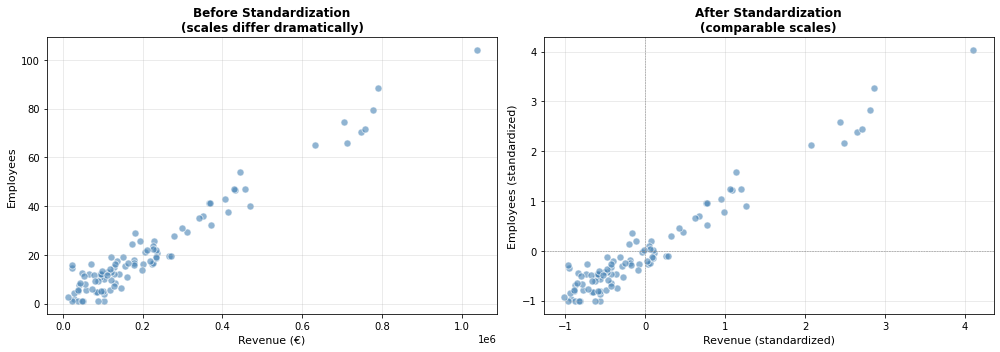

In [8]:
# Visualize the effect of standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before
ax = axes[0]
ax.scatter(firms[:, 0], firms[:, 1], alpha=0.6, c='steelblue', edgecolors='white', s=50)
ax.set_xlabel('Revenue (€)', fontsize=11)
ax.set_ylabel('Employees', fontsize=11)
ax.set_title('Before Standardization\n(scales differ dramatically)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# After
ax = axes[1]
ax.scatter(firms_standardized[:, 0], firms_standardized[:, 1], alpha=0.6, c='steelblue', edgecolors='white', s=50)
ax.set_xlabel('Revenue (standardized)', fontsize=11)
ax.set_ylabel('Employees (standardized)', fontsize=11)
ax.set_title('After Standardization\n(comparable scales)', fontsize=12, fontweight='bold')
ax.axhline(0, color='gray', linewidth=0.5, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.5, linestyle='--')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

*obs*: Standardization ensures that a variation of one standard deviation is weighted equally for all features, eliminating bias caused by differing magnitudes.

### Min-Max Scaling

An alternative approach that rescales features to a fixed range, typically [0, 1]:

$$x'_j = \frac{x_j - \min(x_j)}{\max(x_j) - \min(x_j)}$$

**When to use:**
- When you need bounded values (e.g., for neural networks)
- When zero values should remain zero (important for sparse data)

**Drawback:** Very sensitive to outliers (a single extreme value stretches the entire scale).

### When to use what?

| Method | Use when... | Avoid when... |
|--------|-------------|---------------|
| **Standardization** | Features have different units; using distance-based methods | Data has many outliers |
| **Min-Max** | Need bounded [0,1] range; sparse data with meaningful zeros | Outliers present |
| **No scaling** | All features already on same scale; using tree-based methods | Features have different units |

<div style="background: linear-gradient(135deg, #f093fb 0%, #f5576c 100%); color: white; padding: 20px; border-radius: 10px; margin: 20px 0;">
<h3 style="margin-top: 0;">💡 Key Message</h3>
<p style="font-size: 1.1em; margin-bottom: 0;"><strong>Scaling is part of the model.</strong> The choice of how (or whether) to scale your features is not a mere preprocessing step — it fundamentally changes what "similar" means in your analysis.</p>
</div>

---

# Hands on Data

---


In this section, we will work hands-on with data to understand distance metrics and scaling.

### Step 1: Load and Explore Data

We will use the **Iris dataset** (ignoring the labels) as our main example, and also generate a **synthetic "socio-economic" dataset**.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris (we will ignore the labels for unsupervised learning)
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Iris Dataset")
print(f"Shape: {X_iris.shape}")
print(f"Features: {list(X_iris.columns)}")
X_iris.describe().round(2)

Iris Dataset
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [10]:
# Generate synthetic socio-economic data
np.random.seed(123)
n = 200

socio_econ = pd.DataFrame({
    'income': np.random.lognormal(10.5, 0.8, n),           # Annual income (€)
    'education_years': np.random.normal(14, 3, n),         # Years of education
    'age': np.random.normal(42, 12, n),                    # Age
    'savings_rate': np.random.beta(2, 5, n) * 100,         # Savings as % of income
})

# Ensure reasonable bounds
socio_econ['education_years'] = socio_econ['education_years'].clip(6, 25)
socio_econ['age'] = socio_econ['age'].clip(18, 80)

print("\nSynthetic Socio-Economic Dataset")
print(f"Shape: {socio_econ.shape}")
socio_econ.describe().round(2)


Synthetic Socio-Economic Dataset
Shape: (200, 4)


,income,education_years,age,savings_rate
count,200.00,200.00,200.00,200.00
mean,51341.11,13.66,42.96,28.77
std,46944.60,2.78,11.88,15.50
min,2738.47,7.25,18.00,1.15
25%,20612.33,11.71,35.00,17.44
50%,36654.42,13.57,43.42,26.31
75%,64529.03,15.74,52.32,39.28
max,290292.16,22.88,72.72,79.78


### Step 2: Visualize Feature Distributions

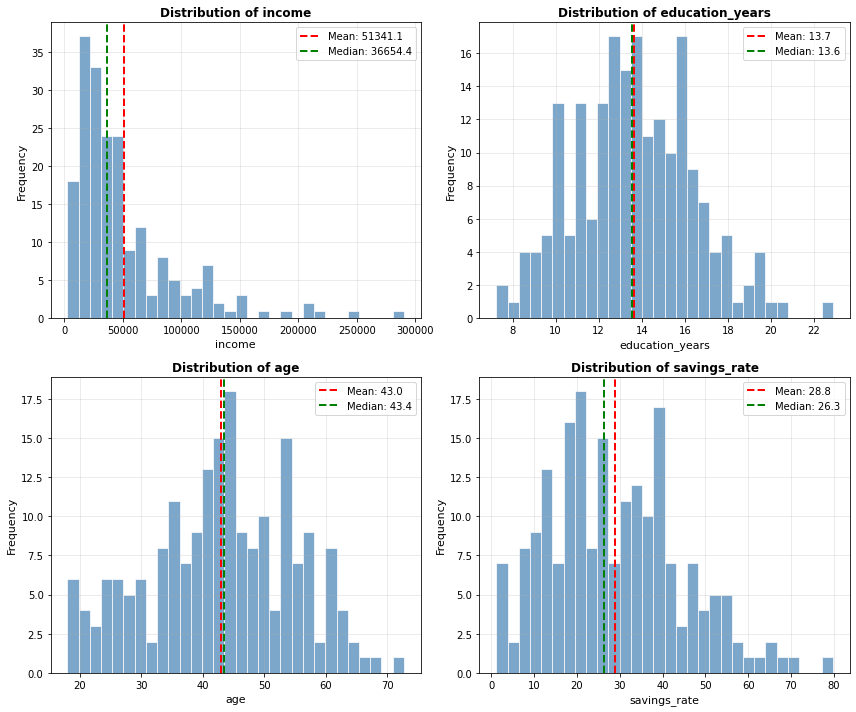

In [11]:
# Distribution of socio-economic features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col in zip(axes.flat, socio_econ.columns):
    ax.hist(socio_econ[col], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
    ax.axvline(socio_econ[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {socio_econ[col].mean():.1f}')
    ax.axvline(socio_econ[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {socio_econ[col].median():.1f}')
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

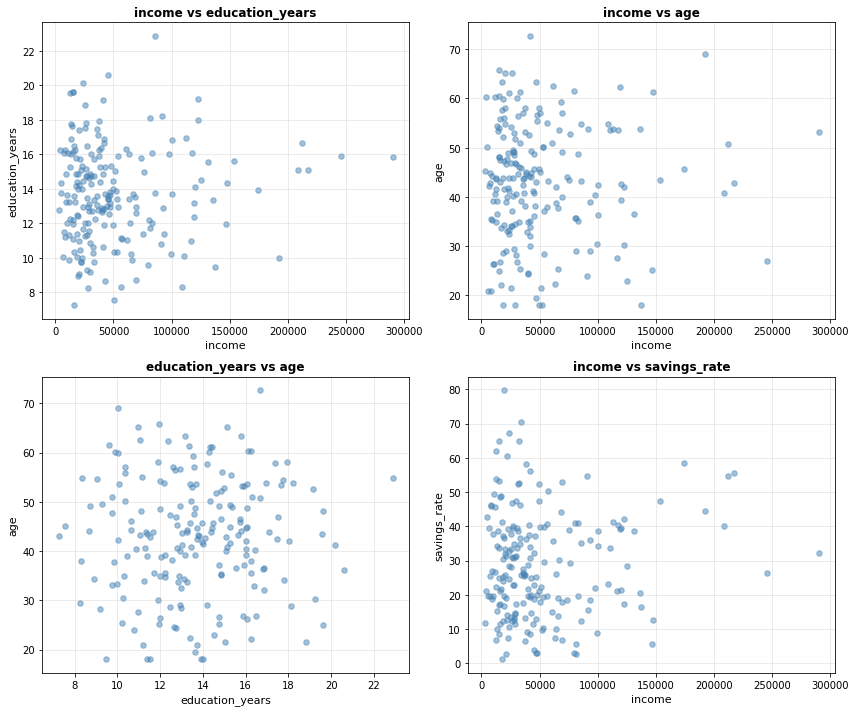

In [12]:
# Scatter plot matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

pairs = [('income', 'education_years'), ('income', 'age'), 
         ('education_years', 'age'), ('income', 'savings_rate')]

for ax, (x_col, y_col) in zip(axes.flat, pairs):
    ax.scatter(socio_econ[x_col], socio_econ[y_col], alpha=0.5, s=30, c='steelblue')
    ax.set_xlabel(x_col, fontsize=11)
    ax.set_ylabel(y_col, fontsize=11)
    ax.set_title(f'{x_col} vs {y_col}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 3: Compute Distances

In [13]:
# Select first 10 observations for clearer visualization
X_sample = socio_econ.iloc[:10].values

# Manual distance computations
def compute_euclidean(X):
    n = len(X)
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            D[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
    return D

def compute_manhattan(X):
    n = len(X)
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            D[i, j] = np.sum(np.abs(X[i] - X[j]))
    return D

def compute_cosine(X):
    n = len(X)
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            dot = np.dot(X[i], X[j])
            norm_i = np.linalg.norm(X[i])
            norm_j = np.linalg.norm(X[j])
            D[i, j] = 1 - dot / (norm_i * norm_j)
    return D

dist_euclidean = compute_euclidean(X_sample)
dist_manhattan = compute_manhattan(X_sample)
dist_cosine = compute_cosine(X_sample)

print("Distance matrices computed for 10 observations.")

Distance matrices computed for 10 observations.


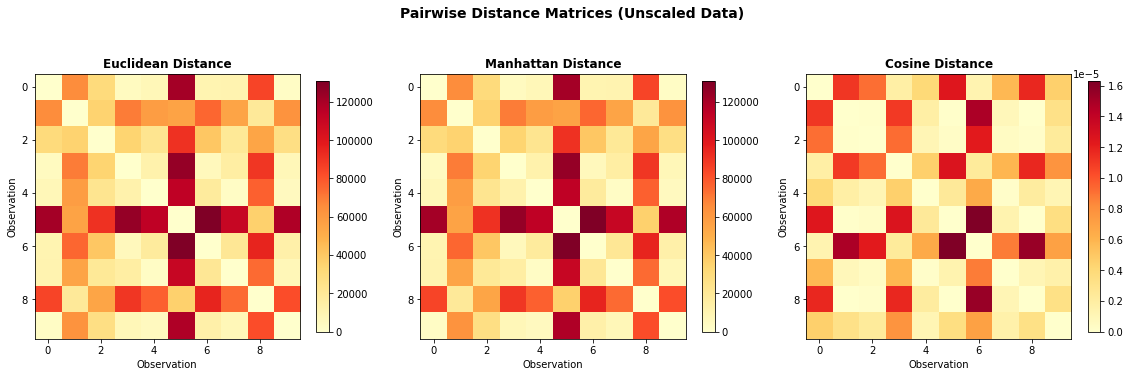

In [14]:
# Visualize distance matrices
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

matrices = [dist_euclidean, dist_manhattan, dist_cosine]
titles = ['Euclidean Distance', 'Manhattan Distance', 'Cosine Distance']

for ax, D, title in zip(axes, matrices, titles):
    im = ax.imshow(D, cmap='YlOrRd')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Observation')
    ax.set_ylabel('Observation')
    plt.colorbar(im, ax=ax, shrink=0.8)

plt.suptitle('Pairwise Distance Matrices (Unscaled Data)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Step 4: Effect of Scaling

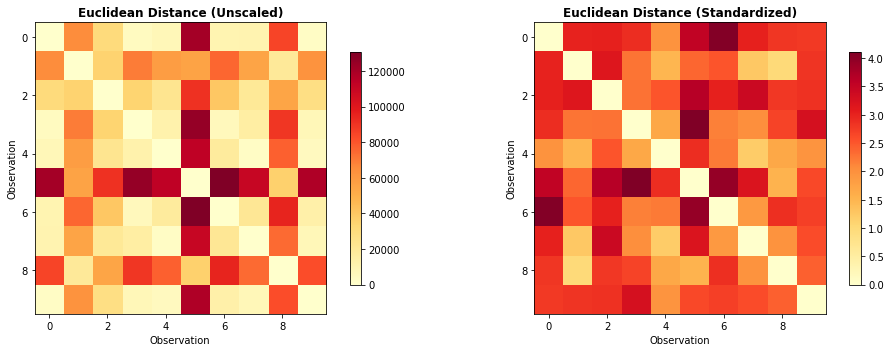

In [15]:
# Standardize the data
X_full = socio_econ.values
means = X_full.mean(axis=0)
stds = X_full.std(axis=0)
X_scaled = (X_full - means) / stds

# Take same sample after scaling
X_sample_scaled = X_scaled[:10]

# Recompute distances
dist_euclidean_scaled = compute_euclidean(X_sample_scaled)

# Compare
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

im1 = axes[0].imshow(dist_euclidean, cmap='YlOrRd')
axes[0].set_title('Euclidean Distance (Unscaled)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Observation')
axes[0].set_ylabel('Observation')
plt.colorbar(im1, ax=axes[0], shrink=0.8)

im2 = axes[1].imshow(dist_euclidean_scaled, cmap='YlOrRd')
axes[1].set_title('Euclidean Distance (Standardized)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Observation')
axes[1].set_ylabel('Observation')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

### Step 5: The Critical Case — Adding a Feature with Very Different Scale

In [16]:
# Add a feature with a much larger scale: total wealth in €
socio_econ_extended = socio_econ.copy()
socio_econ_extended['wealth'] = socio_econ['income'] * np.random.uniform(5, 20, len(socio_econ))

print("Statistics with new 'wealth' feature:")
socio_econ_extended.describe().round(2)

Statistics with new 'wealth' feature:


,income,education_years,age,savings_rate,wealth
count,200.00,200.00,200.00,200.00,200.00
mean,51341.11,13.66,42.96,28.77,638003.20
std,46944.60,2.78,11.88,15.50,637359.67
min,2738.47,7.25,18.00,1.15,14844.32
25%,20612.33,11.71,35.00,17.44,245872.16
50%,36654.42,13.57,43.42,26.31,430936.95
75%,64529.03,15.74,52.32,39.28,784019.03
max,290292.16,22.88,72.72,79.78,4544132.70


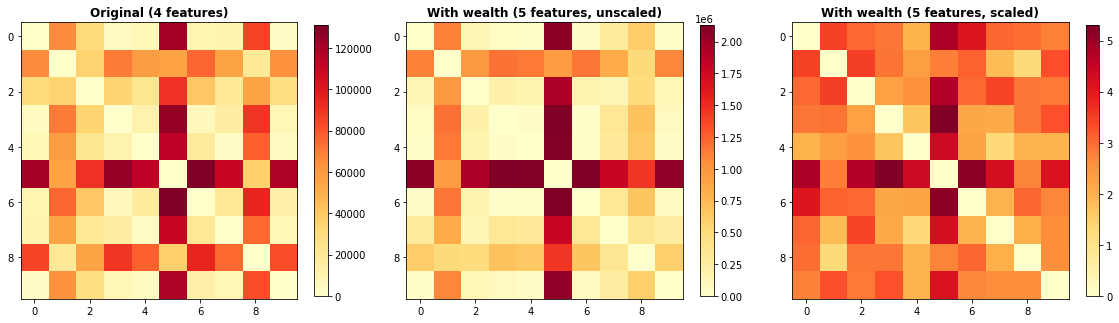

In [17]:
# Compare distances before and after adding wealth (unscaled)
X_original = socio_econ.iloc[:10].values
X_extended = socio_econ_extended.iloc[:10].values

dist_original = compute_euclidean(X_original)
dist_extended = compute_euclidean(X_extended)

# How much did distances change?
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

im1 = axes[0].imshow(dist_original, cmap='YlOrRd')
axes[0].set_title('Original (4 features)', fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0], shrink=0.8)

im2 = axes[1].imshow(dist_extended, cmap='YlOrRd')
axes[1].set_title('With wealth (5 features, unscaled)', fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

# Scaled version
X_ext_full = socio_econ_extended.values
X_ext_scaled = (X_ext_full - X_ext_full.mean(axis=0)) / X_ext_full.std(axis=0)
dist_extended_scaled = compute_euclidean(X_ext_scaled[:10])

im3 = axes[2].imshow(dist_extended_scaled, cmap='YlOrRd')
axes[2].set_title('With wealth (5 features, scaled)', fontsize=12, fontweight='bold')
plt.colorbar(im3, ax=axes[2], shrink=0.8)

plt.tight_layout()
plt.show()

In [18]:
# Analyze feature contributions to distance (observations 0 and 1)
x0 = socio_econ_extended.iloc[0].values
x1 = socio_econ_extended.iloc[1].values

squared_diffs = (x0 - x1)**2
total_sq_dist = squared_diffs.sum()

contributions = pd.DataFrame({
    'Feature': socio_econ_extended.columns,
    'Value (obs 0)': x0,
    'Value (obs 1)': x1,
    'Squared Diff': squared_diffs,
    '% Contribution': 100 * squared_diffs / total_sq_dist
}).sort_values('% Contribution', ascending=False)

print("Feature contributions to Euclidean distance (unscaled):")
print(contributions.round(2).to_string(index=False))

Feature contributions to Euclidean distance (unscaled):
        Feature  Value (obs 0)  Value (obs 1)  Squared Diff  % Contribution
         wealth      147438.13     1257727.76  1.232743e+12           99.65
         income       15237.21       80650.18  4.278858e+09            0.35
            age          60.41          35.64  6.134600e+02            0.00
   savings_rate          53.34          40.83  1.565600e+02            0.00
education_years          16.11          12.21  1.524000e+01            0.00


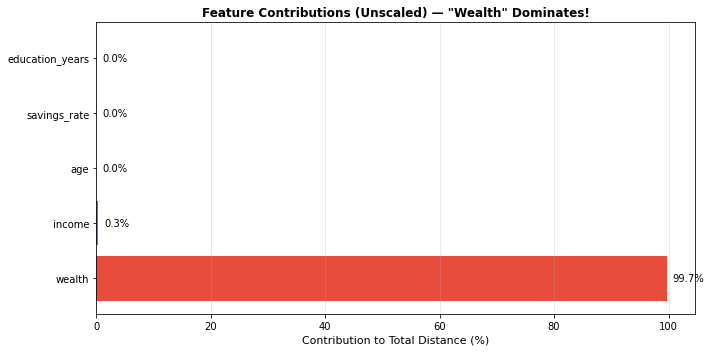

In [19]:
# Visualize the domination
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#e74c3c' if c > 50 else 'steelblue' for c in contributions['% Contribution']]
bars = ax.barh(contributions['Feature'], contributions['% Contribution'], color=colors)

ax.set_xlabel('Contribution to Total Distance (%)', fontsize=11)
ax.set_title('Feature Contributions (Unscaled) — "Wealth" Dominates!', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

for bar, val in zip(bars, contributions['% Contribution']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### What We Learned

The `wealth` feature completely **dominates** the distance calculation. All other features become essentially irrelevant. This is the "collapse" effect — when one feature with a large scale drowns out all others.

**Solution**: Standardize the data before computing distances.

---

#  FAQ

---


### Which distance is "right"?

There is no universally correct answer — and this is not a limitation, but a **feature**. The "right" distance is the one that best captures what "similarity" means in your specific context.

**A practical decision framework:**

| Ask yourself... | If yes, consider... |
|-----------------|---------------------|
| Do I care about the magnitude of my features? | Euclidean or Manhattan |
| Do I only care about the *pattern* (relative proportions)? | Cosine |
| Are my features on very different scales? | Standardize first, then Euclidean |
| Do I have outliers I want to downweight? | Manhattan ($L_1$) |
| Do I have known correlations between features? | Mahalanobis |
| Is my data sparse and high-dimensional? | Cosine |

<div style="background-color: #fff3cd; padding: 15px; border-left: 5px solid #ffc107; margin: 20px 0;">
<strong>⚠️ Key Insight</strong><br/>
The choice of distance metric is a <strong>modeling decision</strong>, not a technical detail. It encodes your assumptions about what makes two observations "similar." Always be explicit about this choice in your research, and consider testing multiple metrics as a robustness check.
</div>

---

### Does the choice depend on the data or on the problem?

**Both — and they interact.** The optimal metric depends on:

1. **Data characteristics** (structure, scale, sparsity)
2. **Domain semantics** (what "similarity" should mean)
3. **Downstream task** (clustering, retrieval, anomaly detection)

**Practical guidelines by domain:**

| Domain | Typical Data | Recommended Metric | Rationale |
|--------|--------------|-------------------|-----------|
| **Text Mining / NLP** | TF-IDF vectors, embeddings | Cosine | Documents vary in length; we care about topic, not word count |
| **Image Processing** | Pixel intensities, features | Euclidean (after normalization) | Spatial relationships matter |
| **Finance / Economics** | Returns, ratios, indicators | Euclidean on standardized data, or Mahalanobis | Features have different units and are often correlated |
| **Genomics** | Gene expression | Correlation-based or Cosine | Expression levels vary by sample; patterns matter more |
| **Geospatial** | Coordinates | Euclidean or Haversine | Physical distance is meaningful |
| **Recommendation Systems** | User-item matrices (sparse) | Cosine | Sparsity; we care about preference patterns |

<div style="background-color: #d4edda; padding: 15px; border-left: 5px solid #28a745; margin: 20px 0;">
<strong>✅ Rule of Thumb</strong><br/>
When in doubt, start with <strong>Euclidean distance on standardized data</strong>. It's interpretable, well-understood, and works reasonably well in most settings. Then test alternatives if you have domain-specific reasons to believe another metric is more appropriate.
</div>

---

###  What happens as dimensionality grows?

This leads to the famous **curse of dimensionality** — one of the most important phenomena in machine learning.

**What goes wrong in high dimensions?**

As the number of features $d$ increases:

1. **Distance concentration**: All pairwise distances converge to similar values. Formally:
   $$\frac{d_{\max} - d_{\min}}{d_{\min}} \to 0 \quad \text{as } d \to \infty$$
   
2. **Nearest neighbors become meaningless**: When all points are approximately equidistant, the concept of "closest" loses discriminative power.

3. **Volume explodes**: The volume of a $d$-dimensional unit hypercube grows as $1^d = 1$, but the volume of the inscribed hypersphere shrinks to zero. Most of the "space" is in the corners!

4. **Sparsity**: Data becomes increasingly sparse. To maintain the same density of points, you need exponentially more observations.

**Practical implications:**

| Problem | Consequence | Mitigation |
|---------|-------------|------------|
| Distance concentration | Clustering becomes unreliable | Dimensionality reduction (PCA, UMAP) |
| Sparse neighborhoods | k-NN classification degrades | Feature selection, regularization |
| Computational cost | $O(n^2 d)$ for pairwise distances | Approximate methods, LSH |

<div style="background-color: #e8f4f8; padding: 15px; border-left: 5px solid #17a2b8; margin: 20px 0;">
<strong>💡 Preview</strong><br/>
We will explore dimensionality reduction techniques (PCA, t-SNE, UMAP) in upcoming lectures. These methods help us project high-dimensional data into lower-dimensional spaces where distance-based methods work better — while preserving the structure that matters.
</div>

**A striking example:**

In 10 dimensions, a random point in a unit hypercube is, on average, closer to a face of the cube than to another random point inside it. Our geometric intuitions from 2D and 3D simply do not transfer!

---

###  Should I always scale my data?

**Almost always, but not blindly.**

**Scale when:**
- Features have different units (€ vs. count vs. percentage)
- Features have very different variances
- You're using distance-based methods (clustering, k-NN, PCA)

**Be careful when:**
- The original scale carries meaning (e.g., physical measurements in SI units)
- You want outliers to have influence (standardization reduces their impact)
- Features are already comparable (e.g., all percentages, all binary)

**Never scale when:**
- Using tree-based methods (Random Forest, XGBoost) — they're scale-invariant
- The algorithm documentation explicitly advises against it

---

### Can I combine different distance metrics?

Yes! There are several approaches:

1. **Weighted combination**: $d_{combined} = \alpha \cdot d_1 + (1-\alpha) \cdot d_2$

2. **Feature-specific metrics**: Use different metrics for different subsets of features (e.g., Euclidean for continuous, Hamming for categorical)

3. **Ensemble methods**: Cluster with multiple metrics and combine results

4. **Learned metrics**: Use metric learning algorithms to learn an optimal distance function from data (advanced topic)

<div style="background-color: #f8d7da; padding: 15px; border-left: 5px solid #dc3545; margin: 20px 0;">
<strong>⚠️ Warning</strong><br/>
Combining metrics adds complexity and hyperparameters. Start simple (single metric) and only add complexity if you have evidence it improves your results.
</div>

---

# Petite Assignment

---

## Exercise 1: Distance Analysis

**Using the Iris dataset:**

1. Compute pairwise distances using Euclidean, Manhattan, and Cosine metrics
2. Plot the distribution of distances for each metric
3. Answer: Which pairs of observations are "closest" according to each metric? Are they the same?
4. Comment on the differences you observe

In [20]:
# YOUR CODE HERE
# Hint: Use the functions defined above or scipy.spatial.distance

from scipy.spatial.distance import pdist, squareform

X = X_iris.values

# 1. Compute pairwise distances
# dist_euc = squareform(pdist(X, metric='euclidean'))
# dist_man = squareform(pdist(X, metric='cityblock'))
# dist_cos = squareform(pdist(X, metric='cosine'))

# 2. Plot distributions
# ...

# 3. Find closest pairs
# ...

pass

## Exercise 2: Effect of Scaling

**Using the socio-economic dataset:**

1. Add a new feature: `annual_spending` = income × random multiplier between 0.3 and 0.9 (in €)
2. Compute Euclidean distances **without** scaling
3. Compute Euclidean distances **with** standardization
4. Analyze: What percentage of the total distance is contributed by each feature in both cases?
5. Explain mathematically why this happens

In [21]:
# YOUR CODE HERE

# 1. Add spending feature
# ...

# 2-3. Compute distances
# ...

# 4. Analyze contributions
# ...

# 5. Written explanation
# ...

pass

## Exercise 3: Distance Metrics in Practice — Dense vs. Sparse Data

In this exercise, you will work with two dataset that represent fundamentally different data structures. Your goal is to understand how the choice of distance metric affects similarity measurements and why "one size does not fit all."

---

### Dataset A: Survey Data (Dense)

Survey data with Likert-scale responses (1-7). Each respondent answers most questions — the data is **dense**.


In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Simulate survey-style data
np.random.seed(42)
n_respondents = 200
n_questions = 25

# Create 3 latent "profiles" that respondents cluster around
profiles = np.array([
    [6, 6, 5, 2, 2, 3, 6, 5, 6, 2, 3, 2, 6, 5, 6, 2, 2, 3, 5, 6, 6, 2, 3, 2, 5],  # Profile A
    [2, 3, 2, 6, 6, 5, 2, 2, 3, 6, 5, 6, 2, 3, 2, 6, 5, 6, 2, 2, 3, 6, 5, 6, 3],  # Profile B
    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],  # Profile C
])

profile_assignment = np.random.choice(3, n_respondents, p=[0.35, 0.35, 0.30])
survey_data = profiles[profile_assignment] + np.random.normal(0, 1.2, (n_respondents, n_questions))
survey_data = np.clip(np.round(survey_data), 1, 7)

question_names = [f"Q{i+1}" for i in range(n_questions)]
df_survey = pd.DataFrame(survey_data, columns=question_names)

print("Dataset A: Survey Data (Dense)")
print(f"Shape: {df_survey.shape}")
print(f"Sparsity (% zeros): {100 * (df_survey == 0).sum().sum() / df_survey.size:.1f}%")
print(f"\nSample statistics:")
print(df_survey.describe().loc[['min', 'max', 'mean', 'std']].round(2))



Dataset A: Survey Data (Dense)
Shape: (200, 25)
Sparsity (% zeros): 0.0%

Sample statistics:
        Q1    Q2    Q3    Q4    Q5    Q6    Q7    Q8    Q9   Q10  ...   Q16  \
min   1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...  1.00   
max   7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  ...  7.00   
mean  4.36  4.54  3.84  3.76  3.66  3.92  4.34  4.01  4.51  3.86  ...  3.76   
std   1.85  1.63  1.64  1.85  2.01  1.50  1.94  1.64  1.67  1.91  ...  1.90   

       Q17   Q18   Q19   Q20   Q21   Q22   Q23   Q24  Q25  
min   1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.0  
max   7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.00  7.0  
mean  3.40  4.24  3.96  4.16  4.36  3.83  3.82  3.72  4.1  
std   1.63  1.53  1.71  1.90  1.74  1.90  1.52  1.96  1.5  

[4 rows x 25 columns]


---

### Dataset B: Document-Term Matrix (Sparse)

Text data represented as word counts. Each document contains only a fraction of the vocabulary — the data is **sparse**.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
topics = {
    'tech': [
        'computer', 'cpu', 'code', 'data', 'server', 'screen', 'keyboard', 'mouse', 
        'software', 'algorithm', 'binary', 'internet', 'wifi', 'hacker', 'linux', 
        'windows', 'python', 'java', 'gpu', 'ram', 'cloud', 'robot', 'ai', 'bug'
    ],
    'food': [
        'pizza', 'pasta', 'cheese', 'tomato', 'sauce', 'salt', 'pepper', 'sugar',
        'flour', 'oven', 'cook', 'chef', 'restaurant', 'menu', 'delicious', 'spicy',
        'meat', 'vegetable', 'fruit', 'chocolate', 'cake', 'wine', 'beer', 'grill'
    ],
    'nature': [
        'tree', 'river', 'sky', 'forest', 'flower', 'sun', 'rain', 'mountain',
        'ocean', 'sea', 'cloud', 'storm', 'snow', 'wind', 'leaf', 'grass', 'bird',
        'animal', 'wild', 'planet', 'earth', 'star', 'desert', 'lake', 'volcano'
    ],
    'sports': [
        'ball', 'goal', 'score', 'team', 'player', 'stadium', 'referee', 'win',
        'loss', 'champion', 'medal', 'run', 'jump', 'football', 'basketball', 
        'tennis', 'coach', 'fitness', 'gym', 'training', 'match', 'league'
    ],
    'medicine': [
        'doctor', 'nurse', 'hospital', 'pill', 'cure', 'virus', 'health', 'pain',
        'surgery', 'blood', 'heart', 'brain', 'patient', 'disease', 'anatomy',
        'pharmacy', 'ambulance', 'emergency', 'fever', 'cold', 'flu', 'vaccine'
    ]
}

raw_documents = []
labels = []


for topic, vocab in topics.items():
    for _ in range(100): 
        # Ogni documento ora ha tra 20 e 50 parole
        doc_len = np.random.randint(20, 50) 
        words = np.random.choice(vocab, doc_len)
        raw_documents.append(" ".join(words))
        labels.append(topic)

# Create document-term matrix
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = count_vectorizer.fit_transform(raw_documents)

# Also create TF-IDF version
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(raw_documents)

print("Dataset B: Document-Term Matrix (Sparse)")
print(f"Shape: {X_counts.shape}")
print(f"Sparsity (% zeros): {100 * (1 - X_counts.nnz / (X_counts.shape[0] * X_counts.shape[1])):.1f}%")
print(f"Average non-zero entries per document: {X_counts.nnz / X_counts.shape[0]:.1f}")

Dataset B: Document-Term Matrix (Sparse)
Shape: (500, 116)
Sparsity (% zeros): 84.4%
Average non-zero entries per document: 18.1


### Part 1: Understanding the Data Structure

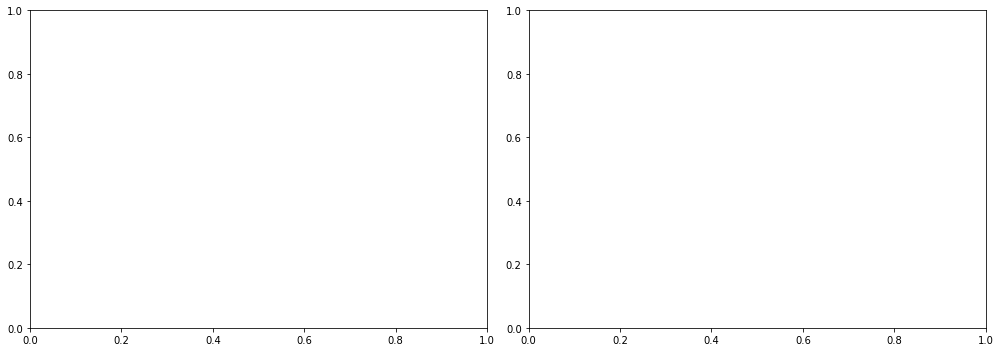

In [25]:
# TODO: Create visualizations showing the difference in data structure

# a) For Survey Data: Show a heatmap of a sample of respondents (rows) x questions (columns)
#    Most cells should be filled (dense)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Survey data heatmap (sample 30 respondents)
# axes[0].imshow(...)
# axes[0].set_title('Survey Data: Dense Structure')

# Document-term matrix heatmap (sample 30 documents)  
# Use: X_counts[:30, :100].toarray() to convert sparse to dense for visualization
# axes[1].imshow(...)
# axes[1].set_title('Text Data: Sparse Structure')

plt.tight_layout()
plt.show()

In [26]:
# TODO: 
# a) For survey data: histogram of all response values
#    What is the range? Is it symmetric?

# b) For text data: histogram of non-zero word counts
#    What does the distribution look like? (Hint: try log scale)

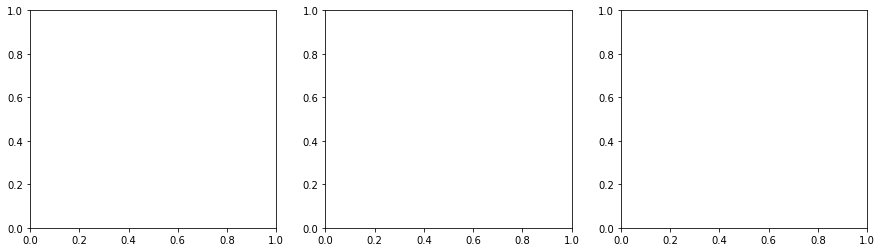

In [27]:
X_survey = df_survey.values

# Compute pairwise distances with three metrics
dist_euclidean = squareform(pdist(X_survey, metric='euclidean'))
dist_manhattan = squareform(pdist(X_survey, metric='cityblock'))
dist_cosine = squareform(pdist(X_survey, metric='cosine'))

# TODO: 
# a) Plot the distribution of pairwise distances for each metric (3 histograms)
#    - What is the range for each?
#    - Which metric produces the most spread (differentiation between pairs)?

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Extract upper triangle (unique pairs only)
# triu_idx = np.triu_indices(len(X_survey), k=1)
# axes[0].hist(dist_euclidean[triu_idx], bins=50, alpha=0.7)
# ...

# b) Standardize the data and recompute Euclidean distances
#    - Does it change the distribution significantly for survey data?
#    - Why or why not? (Think about whether questions are already on the same scale)

# c) Pick two specific respondents and compute their distance with each metric
#    - Respondent 0 (Profile A type) vs Respondent 100 (check which profile)
#    - Interpret what each distance value means

In [29]:
# Take a sample for computational efficiency
np.random.seed(42)
sample_idx = np.random.choice(X_counts.shape[0], 100, replace=False)
X_sample_counts = X_counts[sample_idx].toarray()  # Convert to dense for pdist
X_sample_tfidf = X_tfidf[sample_idx].toarray()

# Compute distances on RAW COUNTS
dist_text_euclidean = squareform(pdist(X_sample_counts, metric='euclidean'))
dist_text_manhattan = squareform(pdist(X_sample_counts, metric='cityblock'))
dist_text_cosine = squareform(pdist(X_sample_counts, metric='cosine'))

# TODO:
# a) Plot the distribution of distances for text data (3 histograms)
#    - How does the range compare to survey data?
#    - What do you notice about Euclidean distances on sparse count data?

# b) Now compute cosine distance on TF-IDF representation instead of raw counts
dist_tfidf_cosine = squareform(pdist(X_sample_tfidf, metric='cosine'))

#    - Compare the distribution to cosine on raw counts
#    - Which representation gives more differentiation?

# c) Pick two documents and analyze:
#    - Document 0 and Document 50
#    - Print their category labels: newsgroups.target_names[newsgroups.target[sample_idx[0]]]
#    - Compute all distances between them
#    - Which metric suggests they are most similar? Most different?

### Part 3: The Effect of Scaling 


In [30]:
# Create a modified survey dataset where questions have DIFFERENT scales
df_survey_mixed = df_survey.copy()
df_survey_mixed['Q1'] = df_survey_mixed['Q1'] * 1000  # Scale Q1 to thousands
df_survey_mixed['Q2'] = df_survey_mixed['Q2'] / 100   # Scale Q2 to decimals

X_mixed = df_survey_mixed.values

# TODO:
# a) Compute Euclidean distances on the mixed-scale data
#    What percentage of the total distance is contributed by Q1 alone?

# b) Standardize the mixed-scale data and recompute
#    Now what is the contribution of each feature?

# c) Does cosine distance "solve" the scaling problem?
#    Compute cosine distance on mixed-scale data — does it match the original?


In [31]:
def compute_feature_contributions(X, metric='euclidean'):
    """
    For each pair of observations, compute what percentage of the 
    total distance comes from each feature.
    Returns the average contribution per feature.
    """
    n_samples, n_features = X.shape
    contributions = np.zeros(n_features)
    
    # TODO: Implement this function
    # Hint for Euclidean: contribution_j = (x_j - y_j)^2 / sum((x - y)^2)
    
    return contributions / contributions.sum()  # Normalize to percentages

# Apply to your data and visualize which features dominate the distance

### Part 4: Interpretation and Recommendations

Answer the following questions based on your experiments:


Based on your experiments, complete this summary:

| Data Characteristic | Implication for Distance Choice |
|---------------------|--------------------------------|
| High sparsity (>90% zeros) | |
| Features on different scales | |
| All features on same scale | |
| Care about magnitude | |
| Care only about pattern/direction | |


---

# References

- **Hastie, T., Tibshirani, R., & Friedman, J.** (2009). *The Elements of Statistical Learning* (2nd ed.). Springer. Chapter 14.

- **Aggarwal, C. C.** (2017). *Outlier Analysis* (2nd ed.). Springer. Chapter 2: Data Models and Data Types.

- **Bishop, C. M.** (2006). *Pattern Recognition and Machine Learning*. Springer. Section 2.5: Nonparametric Methods.

---